In [27]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.vision import *
#widget for class confusion
from fastai.widgets import ClassConfusion
from torch import nn

In [28]:
path = r'/home/jovyan/ALD_phase2/GEE_TIR_b10/4_GEE_imagechips_jpeg_datasetv3_b10_RGB_201801_201701_201704/'
cement = os.path.join(path,'cement')
steel = os.path.join(path,'steel')
landcover = os.path.join(path,'landcover')

len(os.listdir(cement)),len(os.listdir(steel)),len(os.listdir(landcover))

(390, 113, 1059)

#### Transforms

In [29]:
tfms = get_transforms(do_flip=True,
                      flip_vert=True, 
                      max_lighting=None, 
                      max_zoom=1.5, 
                      max_warp=0.2)

np.random.seed(42)
data = (ImageDataBunch.from_folder(path,classes=["cement", "landcover","steel"],valid_pct=0.2,ds_tfms=tfms, bs=16)
        .normalize(imagenet_stats))

In [30]:
data.c

3

In [31]:
data.train_ds

LabelList (1248 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
cement,cement,cement,cement,cement
Path: /home/jovyan/ALD_phase2/GEE_TIR_b10/4_GEE_imagechips_jpeg_datasetv3_b10_RGB_201801_201701_201704

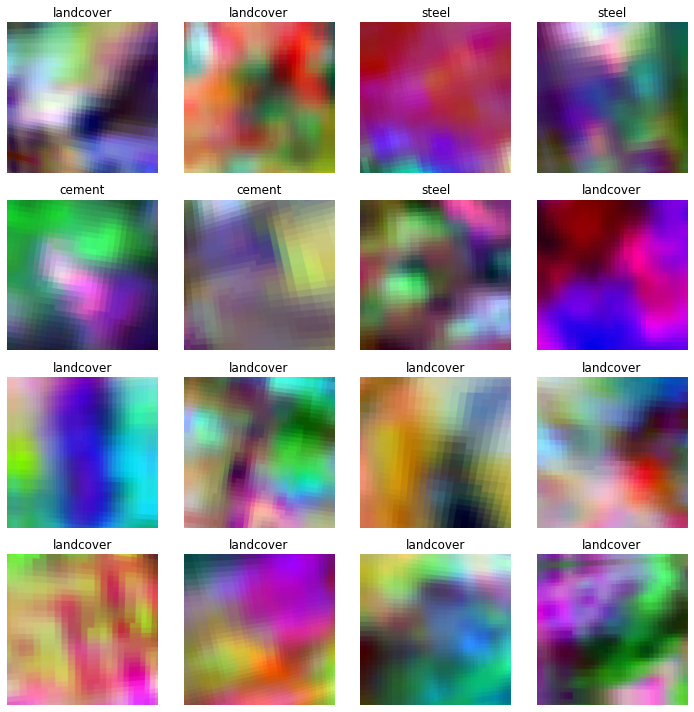

In [78]:
#data.show_batch(rows=5,figsize=(10,10))

In [32]:
#metrics are in captital, so are Classes so need to call them before using
recall = Recall()
precision = Precision()

#fbeta = MultiLabelFbeta(beta =1)
fbeta = FBeta()
metrics_all = [accuracy, recall, precision, fbeta]

# Run 01

Using batch norm instead of dropout

Giving weights to each of the classes: cement | landcover | steel

In [33]:
weights = [1,0.2, 1]
class_weights=torch.FloatTensor(weights).cuda()
loss_w = nn.CrossEntropyLoss(weight=class_weights)


In [34]:
def getLearner():
    return cnn_learner(data, 
                       models.resnet50, 
                       #transfer learning on
                       pretrained = True,
                       #loss_func = LabelSmoothingCrossEntropy(), 
                       #class weighted cross entropy loss
                       loss_func = loss_w,
                       metrics =metrics_all,
                       opt_func=optim.Adam,
                       #batch norm at the end of the CNN
                       bn_final=True,
                       #nice callback for plotting loss for training and 
                       #validation during fitting 
                       #followed by mixup
                       callback_fns=ShowGraph).mixup()

learn = getLearner()

Important for learning rate to be steep and going DOWN

# ResNet 50 with mixup results

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


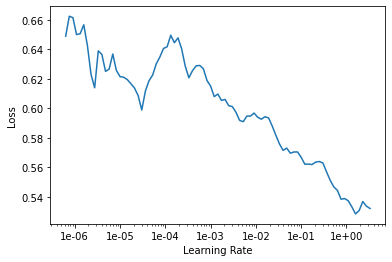

In [35]:
learn.lr_find()
learn.recorder.plot()

Picking highest steepest Lr that is still going **down**

- run with cross entropy loss that has the weight for landcover as super low
- callback that catches the highest recall value in a run. 'improvement' instead of epoch so we save the best overall model judged by recall. 

epoch,train_loss,valid_loss,accuracy,recall,precision,f_beta,time
0,0.502909,0.486043,0.475884,0.417118,0.423930,0.389561,00:06
1,0.471585,0.450604,0.456592,0.392226,0.406479,0.394996,00:06
2,0.442684,0.433863,0.614148,0.448144,0.434646,0.445378,00:06
3,0.407536,0.380110,0.627010,0.517030,0.523964,0.518402,00:06
4,0.392999,0.356921,0.659164,0.507525,0.551704,0.515786,00:06
5,0.389467,0.332004,0.591640,0.531849,0.508365,0.526981,00:06
6,0.381775,0.369214,0.610932,0.471000,nan,0.000000,00:06
7,0.382081,0.338894,0.800643,0.568071,0.841005,0.607502,00:06
8,0.362697,0.348585,0.717042,0.684983,0.594104,0.664649,00:06
9,0.361093,0.305696,0.700965,0.691578,0.619766,0.675915,00:06


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


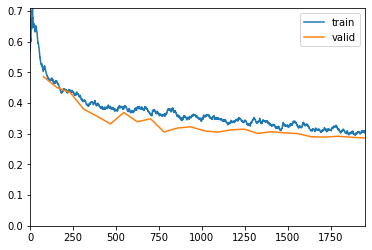

Better model found at epoch 0 with recall value: 0.4171179533004761.


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


Better model found at epoch 2 with recall value: 0.44814449548721313.


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


Better model found at epoch 3 with recall value: 0.5170304179191589.


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


Better model found at epoch 5 with recall value: 0.5318493247032166.


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


Better model found at epoch 7 with recall value: 0.5680710077285767.


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


Better model found at epoch 8 with recall value: 0.6849827170372009.


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


Better model found at epoch 9 with recall value: 0.691578209400177.


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai

Better model found at epoch 13 with recall value: 0.698523759841919.


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai

Better model found at epoch 18 with recall value: 0.7079375386238098.


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai

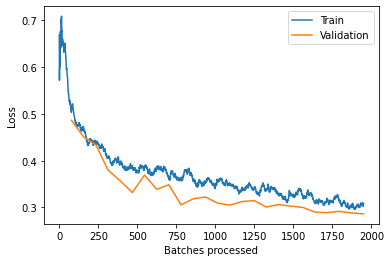

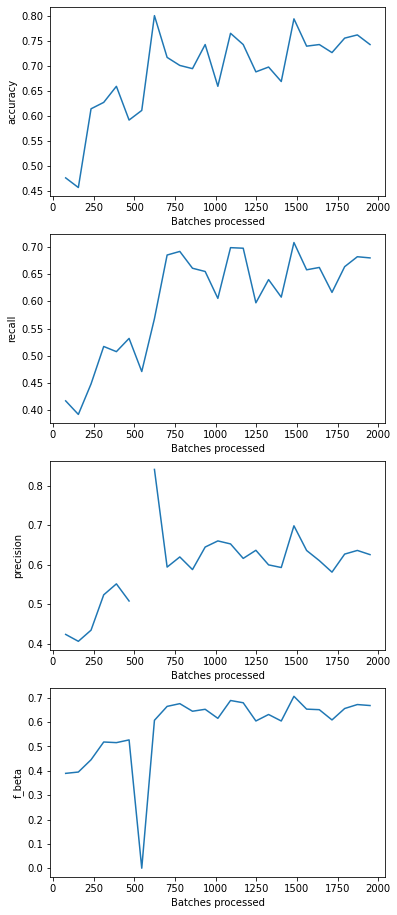

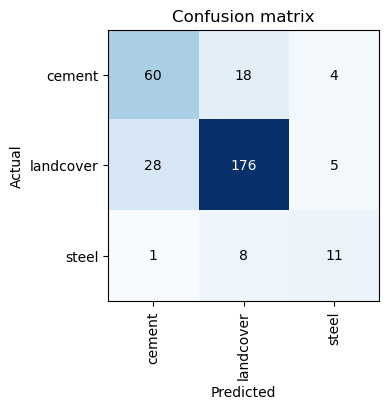

In [36]:
learn.fit_one_cycle(25,1e-02, callbacks=[callbacks.SaveModelCallback(learn, 
                                                                    every='improvement',
                                                                    monitor='recall',
                                                                    name='01_model_temp1')])
#learn.save('02-1_ResNet50_lcv1_wghtXE_Mixup_BatchN_stage01')

learn.recorder.plot_losses() ,learn.recorder.plot_metrics()
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(title='Confusion matrix',dpi=100)

    Now load the model with the best recall value

In [37]:
#now load the model with the best recall
learn.load('01_model_temp1')

Learner(data=ImageDataBunch;

Train: LabelList (1248 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
cement,cement,cement,cement,cement
Path: /home/jovyan/ALD_phase2/GEE_TIR_b10/4_GEE_imagechips_jpeg_datasetv3_b10_RGB_201801_201701_201704;

Valid: LabelList (311 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
steel,steel,cement,landcover,landcover
Path: /home/jovyan/ALD_phase2/GEE_TIR_b10/4_GEE_imagechips_jpeg_datasetv3_b10_RGB_201801_201701_201704;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): B

## Fine tune the whole model:

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


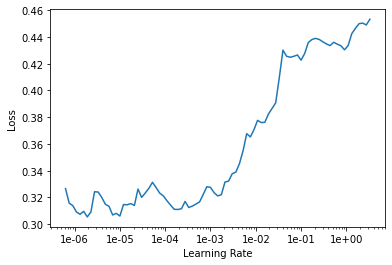

In [40]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,recall,precision,f_beta,time
0,0.318299,0.290386,0.726688,0.701867,0.623909,0.675318,00:07
1,0.329631,0.316537,0.781350,0.608406,0.637209,0.613957,00:07
2,0.352267,0.339123,0.681672,0.589359,0.549393,0.580907,00:07
3,0.358876,0.316739,0.736334,0.636233,0.600578,0.628768,00:07
4,0.361467,0.311169,0.739550,0.637828,0.646694,0.639582,00:07
5,0.343308,0.303490,0.588424,0.628096,0.554501,0.611854,00:07
6,0.323590,0.289420,0.691318,0.659120,0.592303,0.644577,00:07
7,0.324795,0.275027,0.765273,0.683201,0.658424,0.678098,00:07
8,0.317651,0.271026,0.745981,0.708716,0.665463,0.699621,00:07
9,0.315872,0.280236,0.749196,0.702900,0.652262,0.692153,00:07


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


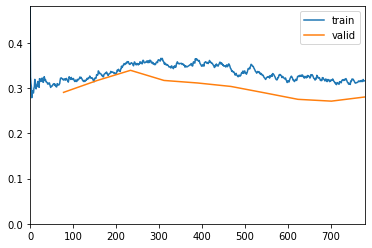

Better model found at epoch 0 with recall value: 0.7018672227859497.


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai

Better model found at epoch 8 with recall value: 0.708715558052063.


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [41]:
learn.fit_one_cycle(10, 1e-04,callbacks=[callbacks.SaveModelCallback(learn, 
                                                                    every='improvement',
                                                                    monitor='recall',
                                                                    name='01_model_temp2')])
#learn.save('3ResNet50_lcv1_wghtXE_Mixup_BatchN_stage02')


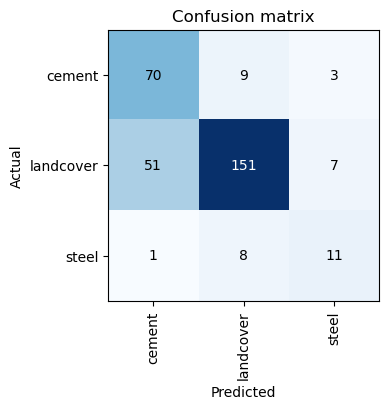

In [42]:
#learn.recorder.plot_losses() ,learn.recorder.plot_metrics()
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(title='Confusion matrix',dpi=100)

Load the best recall optimised model

In [44]:
learn.load('01_model_temp2')

Learner(data=ImageDataBunch;

Train: LabelList (1248 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
cement,cement,cement,cement,cement
Path: /home/jovyan/ALD_phase2/GEE_TIR_b10/4_GEE_imagechips_jpeg_datasetv3_b10_RGB_201801_201701_201704;

Valid: LabelList (311 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
steel,steel,cement,landcover,landcover
Path: /home/jovyan/ALD_phase2/GEE_TIR_b10/4_GEE_imagechips_jpeg_datasetv3_b10_RGB_201801_201701_201704;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): B

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


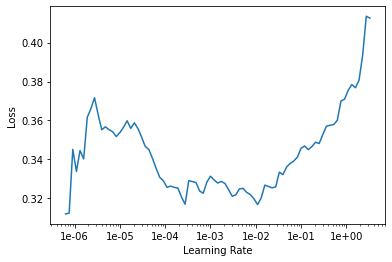

In [45]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,recall,precision,f_beta,time
0,0.310871,0.277277,0.755627,0.711030,0.676900,0.697210,00:06
1,0.310903,0.274739,0.762058,0.709280,0.660403,0.698934,00:06
2,0.307055,0.274254,0.745981,0.691174,0.650397,0.682614,00:06
3,0.309881,0.272757,0.762058,0.706809,0.664618,0.697948,00:06
4,0.311537,0.278700,0.768489,0.702338,0.684891,0.698778,00:06
5,0.297978,0.272167,0.771704,0.701463,0.695011,0.700163,00:06
6,0.297346,0.270712,0.736334,0.706401,0.662414,0.697142,00:06
7,0.294741,0.269874,0.778135,0.719724,0.676727,0.710693,00:06
8,0.303759,0.264217,0.768489,0.719880,0.666781,0.708594,00:06
9,0.302614,0.264428,0.771704,0.719005,0.694362,0.713937,00:06


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


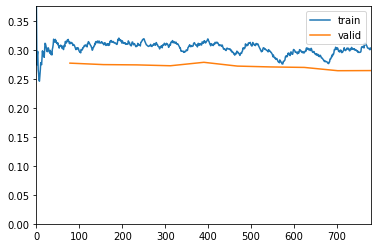

Better model found at epoch 0 with recall value: 0.7110300660133362.


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai

Better model found at epoch 7 with recall value: 0.7197242379188538.


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


Better model found at epoch 8 with recall value: 0.7198798060417175.


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [46]:
learn.fit_one_cycle(10, 7e-04,callbacks=[callbacks.SaveModelCallback(learn, 
                                                                    every='improvement',
                                                                    monitor='recall',
                                                                    name='01_model_temp3')])
#learn.save('3ResNet50_lcv1_wghtXE_Mixup_BatchN_stage03')

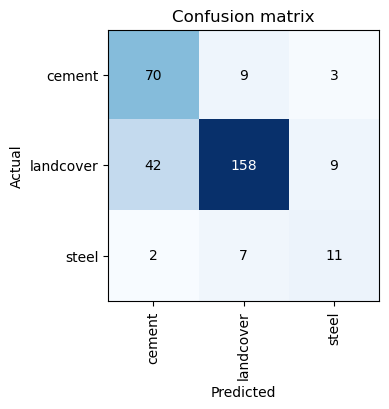

In [47]:
#learn.recorder.plot_losses() ,learn.recorder.plot_metrics()
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(title='Confusion matrix',dpi=100)

epoch,train_loss,valid_loss,accuracy,recall,precision,f_beta,time
0,0.307357,0.270309,0.797428,0.729294,0.719222,0.723880,00:07
1,0.313380,0.265521,0.781350,0.723789,0.700374,0.718982,00:07
2,0.293550,0.266572,0.784566,0.722914,0.686988,0.715431,00:07
3,0.291701,0.265550,0.768489,0.717410,0.671343,0.707697,00:07
4,0.300461,0.265669,0.755627,0.713500,0.678132,0.706134,00:07
5,0.287368,0.270289,0.790997,0.726104,0.706102,0.722013,00:07
6,0.302188,0.266362,0.755627,0.713500,0.659246,0.701947,00:07
7,0.295181,0.264383,0.745981,0.708716,0.648619,0.695822,00:07
8,0.300214,0.266921,0.755627,0.713500,0.664859,0.703211,00:07
9,0.297108,0.271138,0.768489,0.714940,0.652220,0.701449,00:07


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


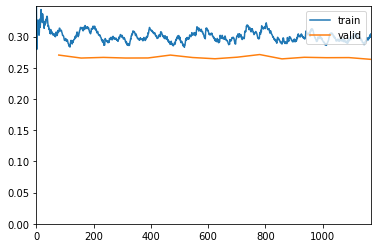

Better model found at epoch 0 with recall value: 0.7292936444282532.


/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/opt/conda/envs/earthai/lib/python3.7/site-packages/fastai

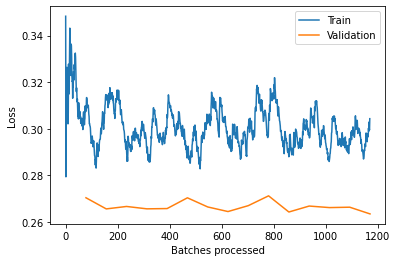

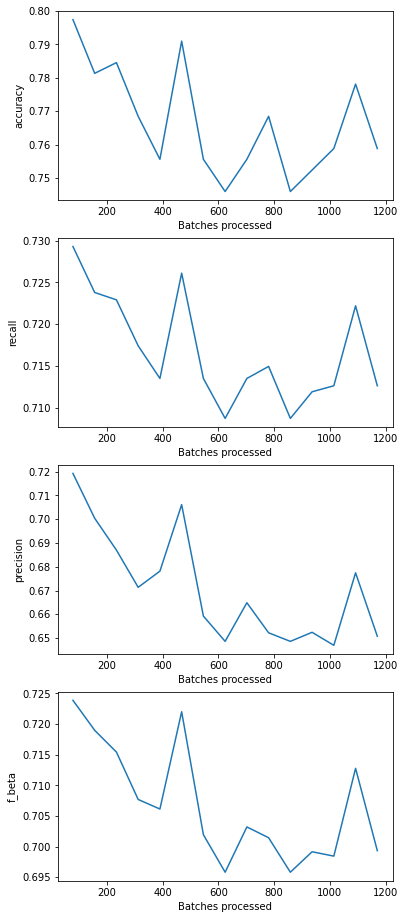

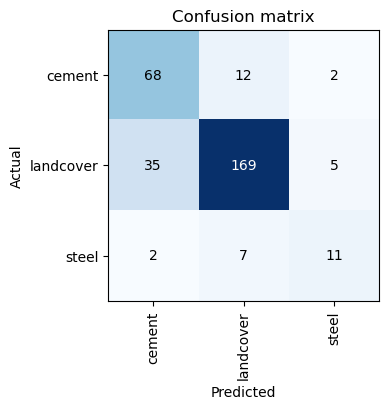

In [48]:
learn.load('01_model_temp3')
learn.unfreeze()
learn.fit_one_cycle(15, 1e-06,callbacks=[callbacks.SaveModelCallback(learn, 
                                                                    every='improvement',
                                                                    monitor='recall',
                                                                    name='01_model_temp_final')])
#learn.save('3ResNet50_lcv1_lblsmXE_Mixup_BatchN_stage04')

learn.recorder.plot_losses() ,learn.recorder.plot_metrics()
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(title='Confusion matrix',dpi=100)

In [49]:
classlist = ['cement','landcover','steel']

ClassConfusion(interp, classlist, is_ordered=False, figsize=(8,8))

Please enter a value for `k`, or the top images you will see:  10


100%|██████████| 6/6 [00:10<00:00,  1.81s/it]


<Figure size 432x288 with 0 Axes>

In [50]:
learn.export()

# RESULTS

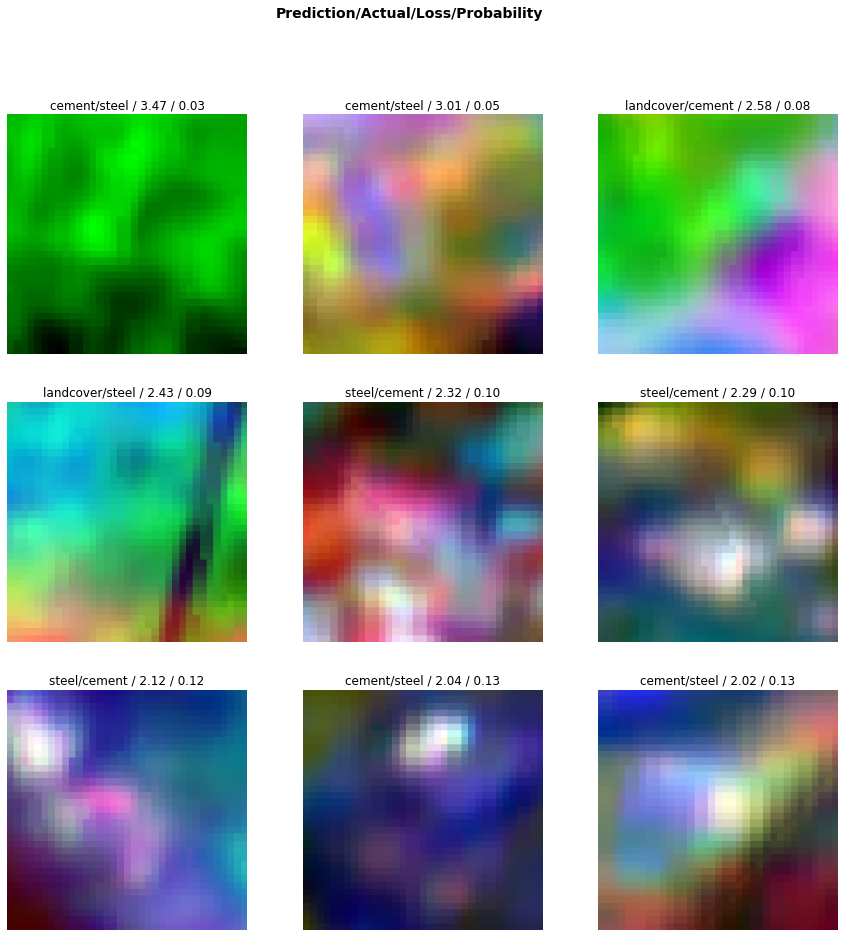

In [64]:
interp.plot_top_losses(9, figsize=(15,15))

Descending lis of largest non diagonal entries for confusion matrix. 

actual | predicted | number of occurences

In [65]:
interp.most_confused()

[('landcover', 'cement', 41),
 ('landcover', 'steel', 22),
 ('cement', 'landcover', 8),
 ('steel', 'cement', 6),
 ('cement', 'steel', 5),
 ('steel', 'landcover', 5)]

In [67]:
classlist = ['cement','landcover','steel']

ClassConfusion(interp, classlist, is_ordered=False, figsize=(8,8))

Please enter a value for `k`, or the top images you will see:  10


100%|██████████| 6/6 [00:11<00:00,  1.97s/it]


<Figure size 432x288 with 0 Axes>

In [68]:
learn.export()

# fin